In [2]:
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.externals import joblib
import joblib
import warnings
warnings.filterwarnings ("ignore")

In [3]:
# Lets begin by reading the csv file

WHR_1= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
WHR_1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
WHR_1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
WHR_1.shape

(158, 12)

In [6]:
#Checking the null values

WHR_1.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
WHR_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
#Lets convert the csv file into a DataFrame

WHR=pd.DataFrame(data=WHR_1)
WHR

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<AxesSubplot:>

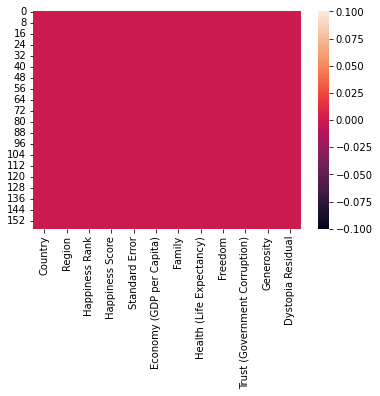

In [10]:
#Lets confirm that there are no missing values with the heatmap
sns.heatmap(WHR.isnull())
#this confirms that there are no missing values

In [11]:
WHR.describe() # if we write WHR.describe(include="all") we get description for all the columns.
#Since mean is nearly same as the median there is a minimal skewness present
#The outliers seem to be high for Dystopia Residual in the GDP per Capita column.
#The standard deviation in all the columns seem to be a small value hence the data is not wide spread.

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
#Lets perform univarite analysis on the attributes

<AxesSubplot:xlabel='Happiness Rank'>

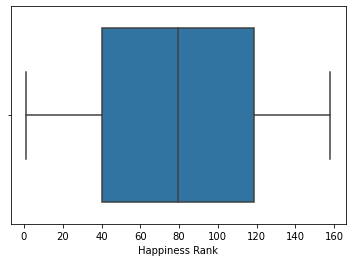

In [13]:
sns.boxplot(x="Happiness Rank",data=WHR)
#No outliers are present here.

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

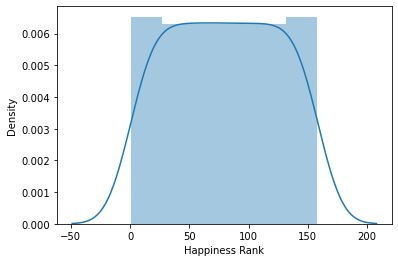

In [14]:
sns.distplot(WHR["Happiness Rank"])
#It seems like a normal distribution

<AxesSubplot:xlabel='Standard Error'>

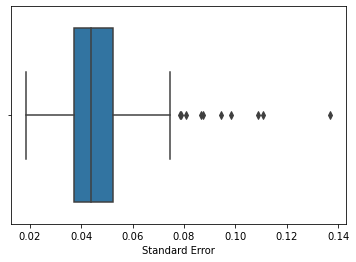

In [15]:
sns.boxplot(x="Standard Error",data=WHR)
#there are outliers which are needed to be removed.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

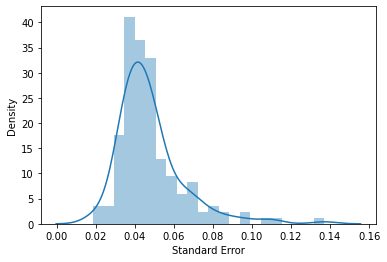

In [16]:
sns.distplot(WHR["Standard Error"],kde=True)
#there is some skweness to the right

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

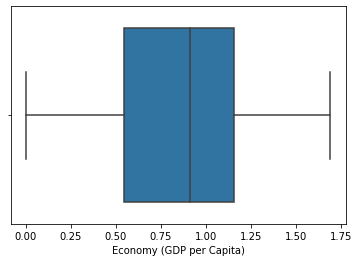

In [17]:
sns.boxplot(x="Economy (GDP per Capita)",data=WHR)
#No outliers are present here.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

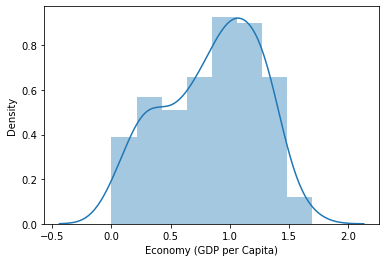

In [18]:
sns.distplot(WHR["Economy (GDP per Capita)"])
#it can be considered fairly normally distributed.

<AxesSubplot:xlabel='Family'>

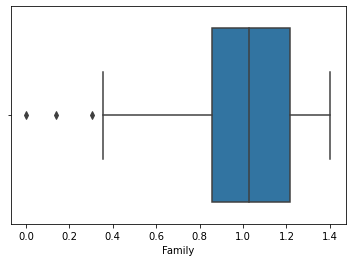

In [19]:
sns.boxplot(x="Family",data=WHR)
#There are outliers present here.

<AxesSubplot:xlabel='Family', ylabel='Density'>

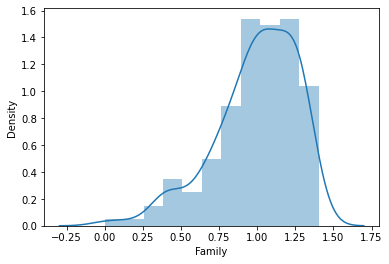

In [20]:
sns.distplot(WHR["Family"])
#it is left skewed.

<AxesSubplot:xlabel='Health (Life Expectancy)'>

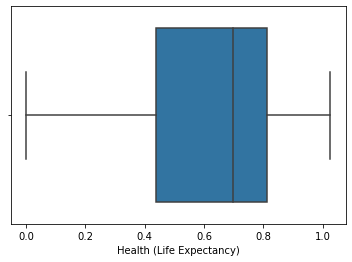

In [21]:
sns.boxplot(x="Health (Life Expectancy)",data=WHR)
#No outliers are present here.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

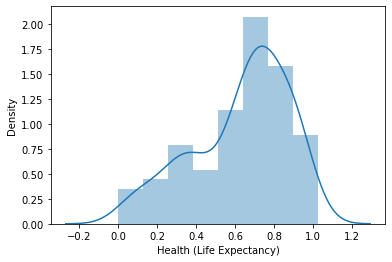

In [22]:
sns.distplot(WHR["Health (Life Expectancy)"])
#it is left skewed

<AxesSubplot:xlabel='Freedom'>

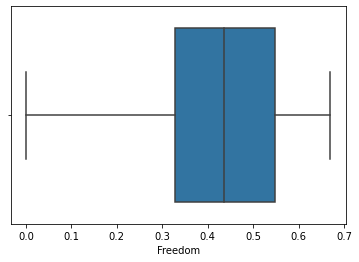

In [23]:
sns.boxplot(x="Freedom",data=WHR)
#No outliers are present here

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

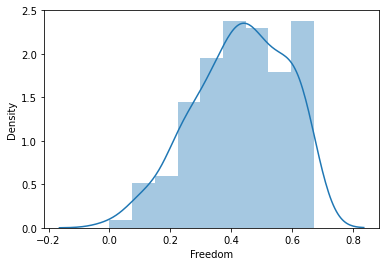

In [24]:
sns.distplot(WHR["Freedom"])
#it is slightly left skewed

<AxesSubplot:xlabel='Trust (Government Corruption)'>

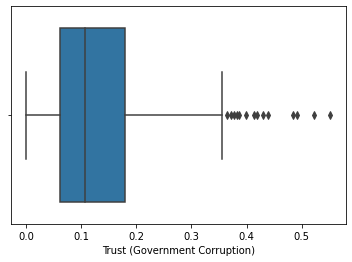

In [25]:
sns.boxplot(x="Trust (Government Corruption)",data=WHR)
#There are outliers present here.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

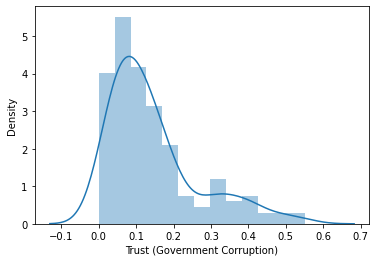

In [26]:
sns.distplot(WHR["Trust (Government Corruption)"])
#it is slightly right skewed

<AxesSubplot:xlabel='Generosity'>

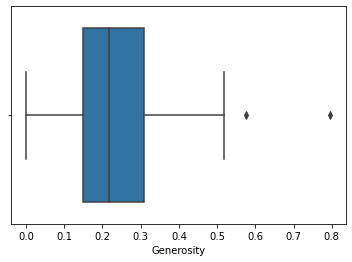

In [27]:
sns.boxplot(x="Generosity",data=WHR)
#There are some outliers present here.

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

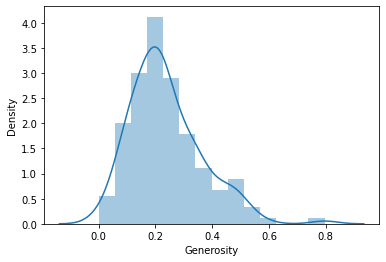

In [28]:
sns.distplot(WHR["Generosity"])
#it is slightly right skewed

<AxesSubplot:xlabel='Dystopia Residual'>

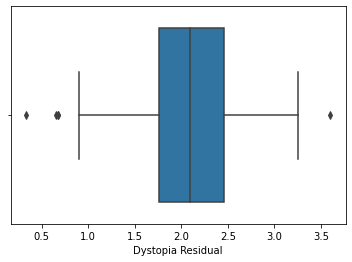

In [29]:
sns.boxplot(x="Dystopia Residual",data=WHR)
#There are some outliers present here

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

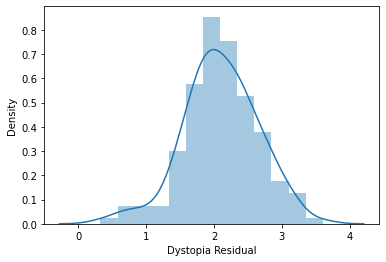

In [30]:
sns.distplot(WHR["Dystopia Residual"])
#its slightly left skewed

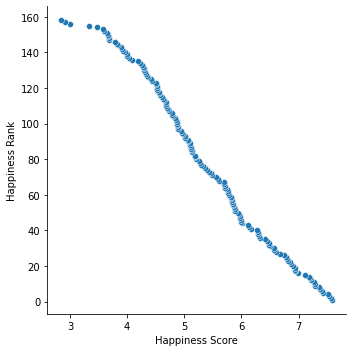

In [31]:
#Lets perform bivariate analysis of dependent and independent variables
sns.relplot(x="Happiness Score",y="Happiness Rank",kind="scatter",data=WHR)
#as one can see, it is a straight line and a linear plot. Happines score is the most at rank 1.

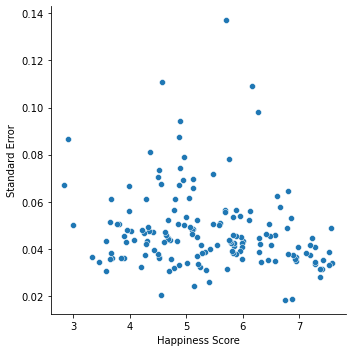

In [32]:
sns.relplot(x="Happiness Score",y="Standard Error",kind="scatter",data=WHR)
#as one can see, it is a straight line and a linear plot.Happiness Score increases with standard error being low.

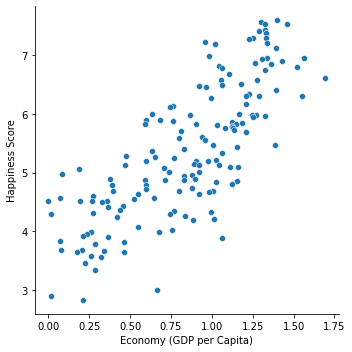

In [33]:
sns.relplot(x="Economy (GDP per Capita)",y="Happiness Score",kind="scatter",data=WHR)
#as one can see, it is a straight line and a linear plot. As GDP increases the happiness score also increases.

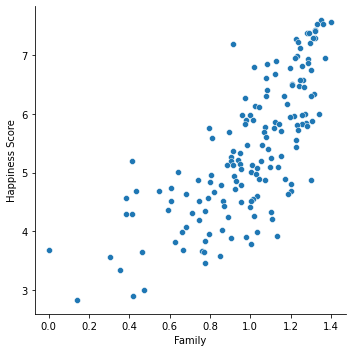

In [34]:
sns.relplot(x="Family",y="Happiness Score",data=WHR)
#as one can see, it is a straight line and a linear plot. With increases in  family support the happiness score increases. 

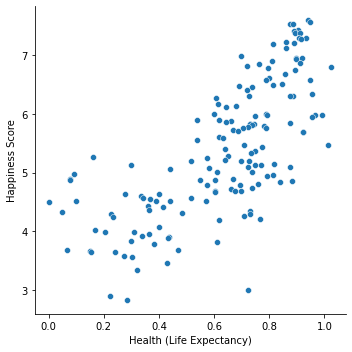

In [36]:
sns.relplot(x="Health (Life Expectancy)",y="Happiness Score",data=WHR)
#as one can see, it is a straight line and a linear plot. With increases in the happiness score health life expectancy increases.

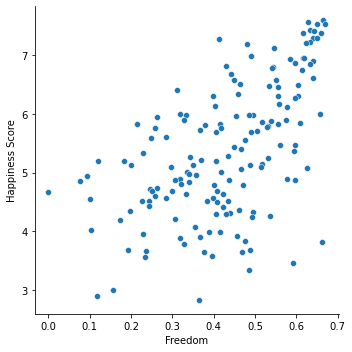

In [37]:
sns.relplot(x="Freedom",y="Happiness Score",data=WHR)
#as one can see, it is a straight line and a linear plot. With increases in freedom the happiness score increases

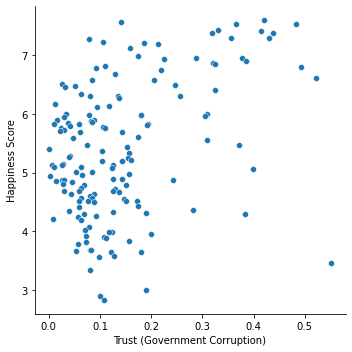

In [38]:
sns.relplot(x="Trust (Government Corruption)",y="Happiness Score",data=WHR)
#As the trust in the government increases, so dose the happiness score.

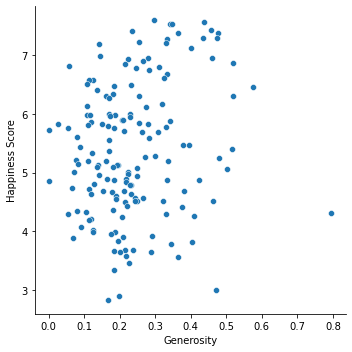

In [39]:
sns.relplot(x="Generosity",y="Happiness Score",data=WHR)
#As the Generosity increases, so dose the happiness score.

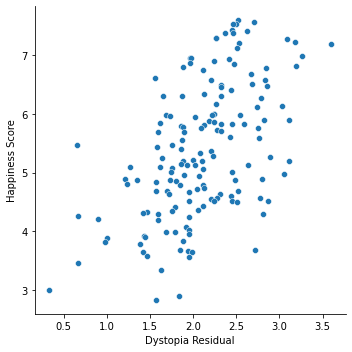

In [40]:
sns.relplot(x="Dystopia Residual",y="Happiness Score",data=WHR)
#With an increase in dystopia residual, the happiness score increases.

In [41]:
#Lets use label encoder to convert object attributes to assign some numneric data which are Country and Region
le=LabelEncoder()
WHR["Country"]=le.fit_transform(WHR["Country"])
WHR["Country"]

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32

In [42]:
le=LabelEncoder()
WHR["Region"]=le.fit_transform(WHR["Region"])
WHR["Region"]

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int32

In [43]:
#One can see the inital object or string values in Country and Region is replaced with numeric values
#Now lets remove outliers using zscore method

zscore(WHR)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,-1.721000,1.937360,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,-0.449465,1.300256,-1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.909893,1.300256,-1.677149,1.884792,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,-1.655224,1.880411,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-1.194920,-0.040302,-1.633299,1.797179,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-1.674055,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.436096,0.965117,1.655501,-1.783571,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,1.260695,-0.375441,1.677427,-2.076199,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-1.260695,0.965117,1.699352,-2.164688,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [44]:
z=np.abs(zscore(WHR))
z

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.449465,1.300256,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.909893,1.300256,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194920,0.040302,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.436096,0.965117,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [45]:
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [46]:
WHR_new=WHR[(z<3).all(axis=1)]
WHR_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [47]:
WHR_new.shape

(149, 12)

In [48]:
WHR_new.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [49]:
#We treat attributes wherever skewness is more than 0.5 whether positive or negative.In our case, the skewness is greater than 0.5 in standard error,family,health(life expectancy),trust(government corruption) and generosity. We shall use power transform methodology to treat the skewness.

WHR_new["Standard Error"]=power_transform(WHR_new["Standard Error"].values.reshape(-1,1))

In [50]:
WHR_new["Family"]=power_transform(WHR_new["Family"].values.reshape(-1,1))

In [51]:
WHR_new["Health (Life Expectancy)"]=power_transform(WHR_new["Health (Life Expectancy)"].values.reshape(-1,1))

In [52]:
WHR_new["Trust (Government Corruption)"]=power_transform(WHR_new["Trust (Government Corruption)"].values.reshape(-1,1))

In [53]:
WHR_new["Generosity"]=power_transform(WHR_new["Generosity"].values.reshape(-1,1))

In [54]:
WHR_new.skew()
#This shows that we have removed the skewness as the values are less than 0.5 either negative or positive.
#We have taken care of the positive or negative skewness below.

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.390657
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.400867
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual               -0.021144
dtype: float64

In [55]:
#Now lets check the correlation between the independent and the dependent variables using heatmap.

WHR_new_corr=WHR_new.corr()
WHR_new_corr["Happiness Score"].sort_values(ascending=False)
#Since the independent variables have  decent correlations with the independent variable we will keep all of them.

Happiness Score                  1.000000
Economy (GDP per Capita)         0.773577
Health (Life Expectancy)         0.756464
Family                           0.753635
Freedom                          0.585066
Dystopia Residual                0.528334
Trust (Government Corruption)    0.404730
Generosity                       0.231255
Country                          0.120109
Region                          -0.145850
Standard Error                  -0.239566
Happiness Rank                  -0.992921
Name: Happiness Score, dtype: float64

In [57]:
#Lets start with Machine Learning Lets separate the dependent variables from the dependent variables. Lets take x as independent variables and y as dependent variable

#x=WHR_new.drop("Happiness Score",axis=1) x

In [58]:
x=WHR_new.iloc[:,0:-1]
x

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,135,9,1,7.587,-0.950337,1.39651,1.658880,1.469636,0.66557,1.817625,0.659579
1,58,9,2,7.561,0.378562,1.30232,2.009125,1.511292,0.62877,0.329676,1.562604
2,37,9,3,7.527,-1.041401,1.32548,1.730785,1.053469,0.64938,1.953400,0.977226
3,105,9,4,7.522,-0.471124,1.45900,1.540248,1.117188,0.66973,1.664359,1.015018
4,24,5,5,7.427,-0.799032,1.32629,1.487718,1.242549,0.63297,1.541247,1.682150
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.563000,0.46534,-1.047195,-1.707662,0.46866,0.681035,-0.131736
151,20,8,152,3.587,-0.068119,0.25812,-0.778550,-1.435893,0.39493,0.188577,0.012019
152,0,7,153,3.575,-1.320810,0.31982,-2.087389,-1.352388,0.23414,-0.192843,1.134258
154,13,8,155,3.340,-0.692726,0.28665,-2.010443,-1.309709,0.48450,-0.434498,-0.312080


In [59]:
#y=WHR_new["Happiness Score"] y

y=WHR_new.iloc[:,-9]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [60]:
#Lets use Standard Scaler to scale down the x variables

S=StandardScaler()
x=S.fit_transform(x)
x

array([[ 1.26826032,  1.29683671, -1.71390512, ...,  1.58370387,
         1.81762514,  0.65957855],
       [-0.41741515,  1.29683671, -1.69153548, ...,  1.33895344,
         0.32967608,  1.56260401],
       [-0.87714482,  1.29683671, -1.66916583, ...,  1.47602698,
         1.95339957,  0.97722591],
       ...,
       [-1.68714472,  0.63509469,  1.68628086, ..., -1.28566246,
        -0.19284339,  1.13425805],
       [-1.40255016,  0.9659657 ,  1.73102015, ...,  0.37943861,
        -0.4344978 , -0.31207994],
       [-1.22741505,  0.9659657 ,  1.77575944, ..., -2.0547641 ,
        -0.14727363, -0.17248608]])

In [61]:
x.shape

(149, 11)

In [62]:
y.shape

(149,)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(104, 11)
(45, 11)
(104,)
(45,)


In [64]:
#Lets use four different algorithms to check the score. We shall be using the following algorithms: 1)Linear Regression 2)Decision Tree 3)Laso 4)Ridge

#1) Linear Regression Algorithm

lm=LinearRegression()
lm.fit(x_train,y_train)
print(lm.coef_)
print(lm.intercept_)
print(lm.score(x_train,y_train))
#predict y values
pred1=lm.predict(x_test)
print("The predicted Happiness Score",pred1)
print("The actual Happiness Score",y_test)
print(r2_score(y_test,pred1))
score1=cross_val_score(lm,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

[-3.73257004e-16 -9.17649759e-16  8.77858566e-16  1.10752090e+00
 -1.42611941e-17  7.85594838e-17  8.76970750e-17  6.72626536e-17
  3.43715000e-16 -1.49091134e-16 -3.21666375e-16]
5.429610738255034
1.0
The predicted Happiness Score [5.286 6.937 4.512 5.192 5.212 6.477 5.605 3.781 5.474 5.124 4.642 7.2
 6.298 7.284 6.901 5.813 3.904 5.429 5.824 4.033 6.505 4.332 6.67  4.252
 4.218 3.655 4.633 4.788 5.975 6.485 6.81  6.983 5.589 7.226 5.995 4.694
 5.855 6.575 7.427 6.455 4.419 5.098 5.073 6.946 7.278]
The actual Happiness Score 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485
22     6.810
15     6.983
68     5.589
11     7.226
44     5.995
108    4.694


In [65]:
#2)Decision Tree
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
#predict y values
pred2=dtc.predict(x_test)
print("The predicted Happiness Score",pred2)
print("the actual Happiness Score",y_test)
print(r2_score(y_test,pred2))
score2=cross_val_score(dtc,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

1.0
The predicted Happiness Score [5.332 6.867 4.517 5.192 5.268 6.295 5.695 3.819 5.477 5.102 4.61  7.406
 6.295 7.286 6.867 5.828 3.989 5.399 5.828 3.989 6.75  4.35  6.75  4.271
 4.194 3.667 4.61  4.8   5.96  6.75  6.574 7.187 5.548 7.119 5.984 4.61
 5.889 6.75  7.286 6.302 4.436 5.123 5.129 6.867 7.286]
the actual Happiness Score 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485
22     6.810
15     6.983
68     5.589
11     7.226
44     5.995
108    4.694
53     5.855
28     6.575
4      7.427
33     6.455
124    4.419
88     5.098
89     5.073
16     6.946
10     7.278
Name: Happiness Score, dtype: float64
0.9916165997051718
[-3.5236928  -0.5660573

In [66]:
#3) Lasso (It will try to omit the coefficient)
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.coef_)
print(ls.intercept_)
print(ls.score(x_train,y_train))
#predict y
pred3=ls.predict(x_test)
print("The predicted Happiness Score",pred3)
print("The predicted Happiness Score",y_test)
print(r2_score(pred3,y_test))
score3=cross_val_score(ls,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

[ 0.00000000e+00  1.04857186e-04 -7.65496867e-03  1.09977437e+00
 -6.26167509e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.69999658e-04  0.00000000e+00]
5.429574159624149
0.9999993426172212
The predicted Happiness Score [5.28678347 6.9368145  4.51099001 5.19288988 5.21308674 6.47702033
 5.60542065 3.78071908 5.47476294 5.12412516 4.64145317 7.19894512
 6.29852603 7.28269118 6.9008331  5.81348613 3.90374645 5.42971222
 5.82435287 4.03254995 6.50506085 4.33111365 6.66985418 4.25066978
 4.21631896 3.65499176 4.63221186 4.78752912 5.97625994 6.48550855
 6.80950114 6.98270543 5.58898731 7.22454654 5.99625212 4.69391157
 5.85584376 6.57561758 7.42573691 6.45512591 4.41787042 5.09806155
 5.07336463 6.94621645 7.27638085]
The predicted Happiness Score 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.90

In [67]:
#4) Ridge (It will try to reduce the coefficient gap)
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
print(rd.coef_)
print(rd.intercept_)
print(rd.score(x_train,y_train))
#predict y
pred4=rd.predict(x_test)
print("The predicted Happiness Score",pred4)
print("The predicted Happiness Score",y_test)
print(r2_score(y_test,pred4))
score4=cross_val_score(rd,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

[ 7.61034166e-07  1.83228915e-06 -8.22334598e-05  1.10743311e+00
 -1.27830509e-06  3.12584637e-06  1.09050701e-06  2.19846152e-07
 -2.71570813e-07  3.36891945e-06  9.14400639e-07]
5.429610101001948
0.9999999999225538
The predicted Happiness Score [5.28600444 6.93699841 4.51198674 5.19200982 5.21201116 6.47699375
 5.60500235 3.78099969 5.47401462 5.12399867 4.64199827 7.19998839
 6.29800595 7.28398504 6.90100098 5.81300437 3.90400056 5.42900894
 5.82400019 4.03299679 6.50499487 4.3319942  6.66999487 4.25198396
 4.21798279 3.65500328 4.63298893 4.78799259 5.97500983 6.48500578
 6.80998976 6.98299116 5.58899543 7.22597733 5.99501255 4.69399635
 5.85500698 6.57500778 7.42698672 6.45500064 4.41898764 5.0980019
 5.07300438 6.94600704 7.27797917]
The predicted Happiness Score 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904

In [68]:
#The best fit model is Linear Regression. There is no need to perform gridsearchCV as there is no hypertuning required.

#Lets perform Serialisation and deserialisation to dump (save) and load the model

joblib.dump(lm,"lmfile.obj")
#obj file is dumped or created
lm_from_joblib=joblib.load("lmfile.obj")
#obj file is loaded
lm_from_joblib.predict(x_test)
#use the loaded model to make predictions.

array([5.286, 6.937, 4.512, 5.192, 5.212, 6.477, 5.605, 3.781, 5.474,
       5.124, 4.642, 7.2  , 6.298, 7.284, 6.901, 5.813, 3.904, 5.429,
       5.824, 4.033, 6.505, 4.332, 6.67 , 4.252, 4.218, 3.655, 4.633,
       4.788, 5.975, 6.485, 6.81 , 6.983, 5.589, 7.226, 5.995, 4.694,
       5.855, 6.575, 7.427, 6.455, 4.419, 5.098, 5.073, 6.946, 7.278])